# Loan Lending club case study


In [320]:
# this is connect google drive to colab.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [321]:
# importing all the lilbraries
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
sns.set(style="darkgrid")
import matplotlib.pyplot as plt
%matplotlib inline

import warnings  # by this warning will be ignored
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize']=(10,10)

In [322]:
# reading csv into df variable.
df = pd.read_csv('/content/drive/MyDrive/Lending club case study 20 oct 2024/loan.csv')
print('Demension of Raw data set = ' + str(df.shape) + '\n')
df.head()

Demension of Raw data set = (39717, 111)



,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


# Finding usefull columns.
In our data set we have total 111 columns, as most of them are filled with null values and with data which are not useful for our business problem, we are going to remove them.

We have found 21 useful columns which have potential to derive any useful insights.

Therefore, we first made list of useful columns name
`useful_columns` and then removed all columns which are not in this list from are dataset.



In [323]:
usefull_columns = ['id', 'member_id', 'loan_amnt', 'term', 'int_rate',
                   'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
                   'verification_status', 'issue_d', 'loan_status', 'purpose', 'addr_state', 'dti',
                    'earliest_cr_line',
                     'revol_util']

# delcaring empty list
useless_columns = []

# using for loop to append are useless columns in the list
for column in df.columns:
    if column not in usefull_columns:
        useless_columns.append(column);

# droping all useless columns and making new data set named df2
df2 = df.drop(columns=useless_columns)
print('Demension of filtered data set = ' + str(df2.shape) + '\n')
df2.head()



Demension of filtered data set = (39717, 20)



,id,member_id,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,earliest_cr_line,revol_util
0,1077501,1296599,5000,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,Jan-85,83.70%
1,1077430,1314167,2500,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,Apr-99,9.40%
2,1077175,1313524,2400,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,Nov-01,98.50%
3,1076863,1277178,10000,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,Feb-96,21%
4,1075358,1311748,3000,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,OR,17.94,Jan-96,53.90%


In [ ]:
# printing sum of null values of all columns
null_counts = df2.isnull().sum()
print(null_counts.to_string())


id                            0
member_id                     0
loan_amnt                     0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_title                  2459
emp_length                 1075
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
purpose                       0
addr_state                    0
dti                           0
earliest_cr_line              0
mths_since_last_delinq    25682
revol_util                   50


---

# Dealing with missing data.
 Following cell in this section will deal with all missing values.







###`emp_title` = 2459
  As we can see `emp_title` have 2459 missing values, as this doesn't hinder any of out anaylis we can safely rename those **unspecified** tag. As this can help in future, if any applicant is not specifing his/her employment title we can take necessary decision on giving loan.

In [324]:
df2['emp_title'].fillna('Unspecified', inplace=True)
print('Demension of data set after replacing NaN with "unspecified" = '    + str(df2.shape) + '\n')

# printing sum of null values of all columns
null_counts = df2.isnull().sum()
print(null_counts.to_string())

Demension of data set after replacing NaN with "unspecified" = (39717, 20)

id                        0
member_id                 0
loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
emp_title                 0
emp_length             1075
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
addr_state                0
dti                       0
earliest_cr_line          0
revol_util               50


---

### `emp_length` = 1075
  We are going to just drop these records, as it can critical parameter we not want to do any replace with mean/median.


In [325]:
df2.dropna(subset=['emp_length'], inplace=True)
print('Demension of data set after removing NaN values = '+ str(df2.shape) + '\n')

# printing sum of null values of all columns
null_counts = df2.isnull().sum()
print(null_counts.to_string())

Demension of data set after removing NaN values = (38642, 20)

id                      0
member_id               0
loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_title               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
addr_state              0
dti                     0
earliest_cr_line        0
revol_util             47


### `revol_util`
AS `revol_util` have percentage `%` in it, that's why it's type is as `object`.
we are going to `rstrip()` from it.

In [326]:
# stripping '%' symbol
df2.revol_util = df2.revol_util.str.replace('%', '').astype(float)  # CAUTION : Run this line only once.

df2.info()  # displaying type of all columns


<class 'pandas.core.frame.DataFrame'>
Index: 38642 entries, 0 to 39716
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   38642 non-null  int64  
 1   member_id            38642 non-null  int64  
 2   loan_amnt            38642 non-null  int64  
 3   term                 38642 non-null  object 
 4   int_rate             38642 non-null  object 
 5   installment          38642 non-null  float64
 6   grade                38642 non-null  object 
 7   sub_grade            38642 non-null  object 
 8   emp_title            38642 non-null  object 
 9   emp_length           38642 non-null  object 
 10  home_ownership       38642 non-null  object 
 11  annual_inc           38642 non-null  float64
 12  verification_status  38642 non-null  object 
 13  issue_d              38642 non-null  object 
 14  loan_status          38642 non-null  object 
 15  purpose              38642 non-null  obje

---
Now we going to replace `NaN` values with median of `revol_util`

(here mean or median doesn't differ that => median =  49.5 and mean = 48.99 )

In [327]:
df2.revol_util = df2.revol_util.fillna(df2.revol_util.median())
print('Demension of data set after removing NaN values = '    + str(df2.shape) + '\n')

null_counts = df2.isnull().sum()
print(null_counts.to_string())


Demension of data set after removing NaN values = (38642, 20)

id                     0
member_id              0
loan_amnt              0
term                   0
int_rate               0
installment            0
grade                  0
sub_grade              0
emp_title              0
emp_length             0
home_ownership         0
annual_inc             0
verification_status    0
issue_d                0
loan_status            0
purpose                0
addr_state             0
dti                    0
earliest_cr_line       0
revol_util             0




---

**IMP note**: we are not going to do anything with missing values of mths_since_last_delinq  because this is parameter which will be narrowed down at the end.

# Handling datatypes

This section will deal with inappropriate data type and rectifiy it.

In [330]:
df2.dtypes

,0
id,int64
member_id,int64
loan_amnt,int64
term,object
int_rate,object
installment,float64
grade,object
sub_grade,object
emp_title,object
emp_length,object


### `term`- rstriping months

We are removing 'months' string from `term` column.





In [331]:
# Using rstrip() function to strip "months"
df2['term'] = df2['term'].str.rstrip(' months').astype(int) # CAUTION : Run this line only once.
df2.dtypes

,0
id,int64
member_id,int64
loan_amnt,int64
term,int64
int_rate,object
installment,float64
grade,object
sub_grade,object
emp_title,object
emp_length,object


### `int_rate` - removing `%` symbols

Now we are removing % symbols and converting them into int

In [332]:
df2.int_rate = df2.int_rate.str.replace('%', '').astype(float)  # stripping '%' symbol
df2.info()


<class 'pandas.core.frame.DataFrame'>
Index: 38642 entries, 0 to 39716
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   38642 non-null  int64  
 1   member_id            38642 non-null  int64  
 2   loan_amnt            38642 non-null  int64  
 3   term                 38642 non-null  int64  
 4   int_rate             38642 non-null  float64
 5   installment          38642 non-null  float64
 6   grade                38642 non-null  object 
 7   sub_grade            38642 non-null  object 
 8   emp_title            38642 non-null  object 
 9   emp_length           38642 non-null  object 
 10  home_ownership       38642 non-null  object 
 11  annual_inc           38642 non-null  float64
 12  verification_status  38642 non-null  object 
 13  issue_d              38642 non-null  object 
 14  loan_status          38642 non-null  object 
 15  purpose              38642 non-null  obje

### `issue_d` - converting it date format

Here in dataset data in issue_d is like "Dec-11".
we are going to convert in date format in pandas.


In [333]:

df2.issue_d = pd.to_datetime(df2.issue_d, format='%b-%y')
df2.issue_d

,issue_d
0,2011-12-01
1,2011-12-01
2,2011-12-01
3,2011-12-01
4,2011-12-01
...,...
39712,2007-07-01
39713,2007-07-01
39714,2007-07-01
39715,2007-07-01


In [334]:
# creating new column named issue_month which will have only month of issue_d, so it will easier in future analysis realted to date and month

# Convert the 'issue_d' column to datetime format
df2['issue_d'] = pd.to_datetime(df2['issue_d'])

# Extract the month from 'issue_d'
df2['issue_month'] = df2['issue_d'].dt.month

### `earliest_cr_line` - converting it date format

Here in dataset data in earliest_cr_line is like "Dec-11".
we are going to convert in date format in pandas.

In [335]:
df2.earliest_cr_line = pd.to_datetime(df2.earliest_cr_line, format='%b-%y')
df2.earliest_cr_line
df2.dtypes

,0
id,int64
member_id,int64
loan_amnt,int64
term,int64
int_rate,float64
installment,float64
grade,object
sub_grade,object
emp_title,object
emp_length,object


### converting `emp_length` in categorical type
As emp_length have values like 10+ year, 1< years etc, so for ease in future we convert them into categorical type and then we can order them in ascending manner so it will easier and nice to view.



In [336]:
#  frist we will declare one list and insert value fo emp_lenght into it
emp_order = ['< 1 year', '1 year', '2 years', '3 years', '4 years',
             '5 years', '6 years', '7 years', '8 years', '9 years', '10+ years']

# this following line will treat value in emp_lenght as categorical type (found this trick on stack overflow)
df2['emp_length'] = pd.Categorical(df2['emp_length'], categories=emp_order, ordered=True)

# Finding Outliers

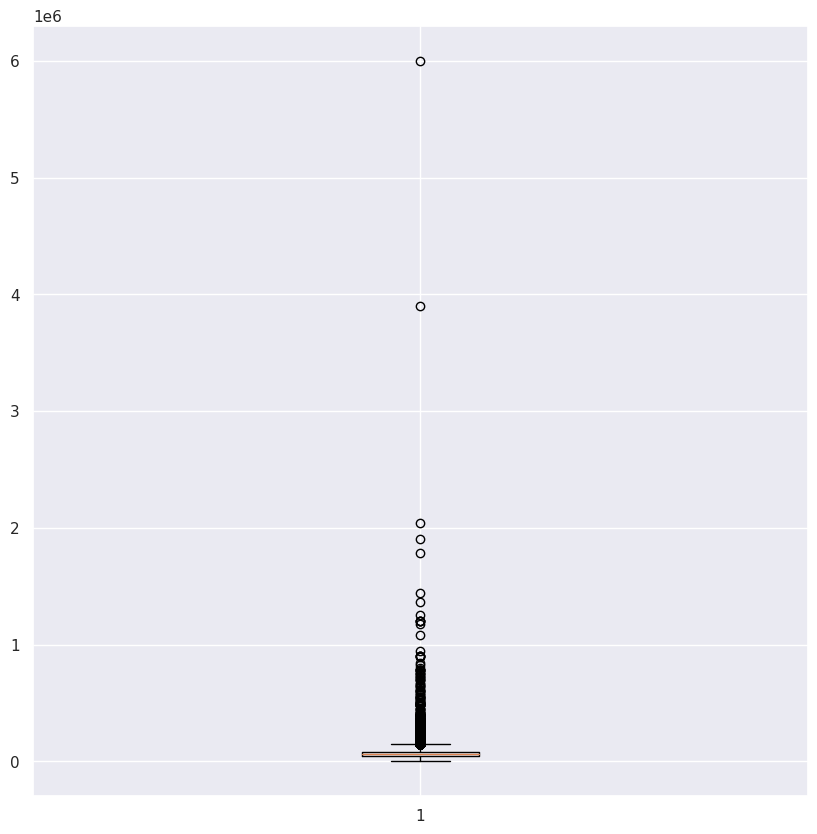

In [337]:
# box ploting annual income
plt.boxplot(df2.annual_inc)
plt.show()

In [338]:
# Checking loan_status of poeple having income above 250000

df2[(df2.annual_inc > 250000) ].loan_status.value_counts()


,count
loan_status,
Fully Paid,259
Charged Off,30
Current,9


---

* **we are removing income more than 250000**
As poeple above 250000 income marked as 'charged off' are only 30, we can consider above this income scale as outliers.

---

In [339]:
# removing records which have income more than 250000
df2 = df2[~(df2.annual_inc > 250000)]
df2.shape

(38344, 21)

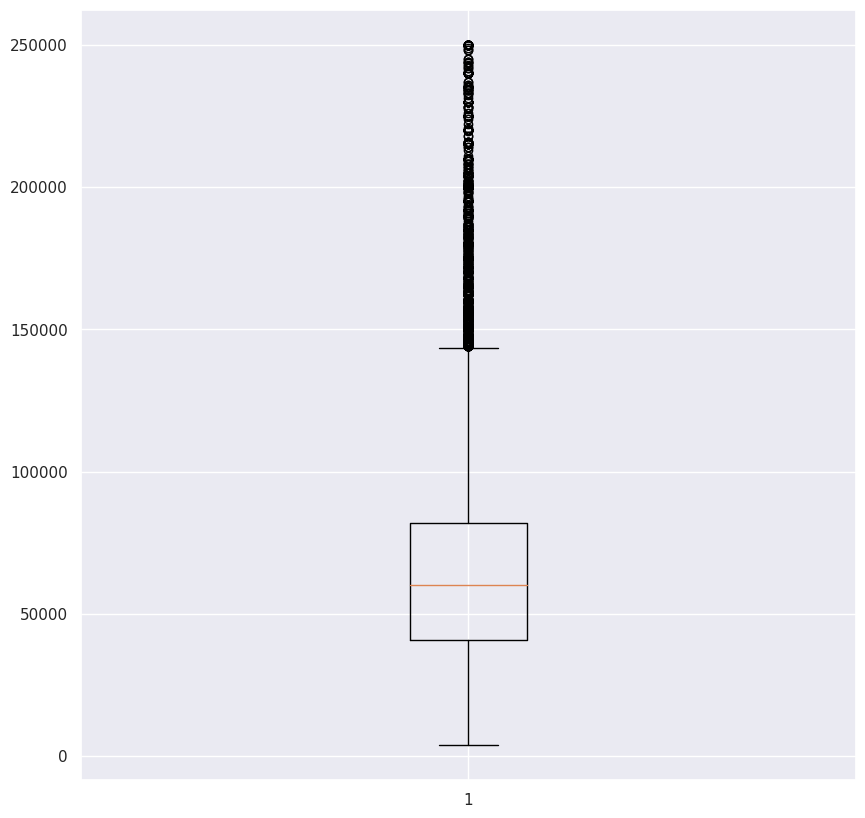

In [340]:
# ploting again after removing outliers
plt.boxplot(df2.annual_inc)
plt.show()

now have this more ideal for analysis...there are still outlier but this higher income poeple tend to take higher loan and marked as charged off so analyzing these high income indiviual is also necessary. so we will not remove any outlier from this extend.

# Insights


## Uni-Variate


<Figure size 1500x2000 with 0 Axes>

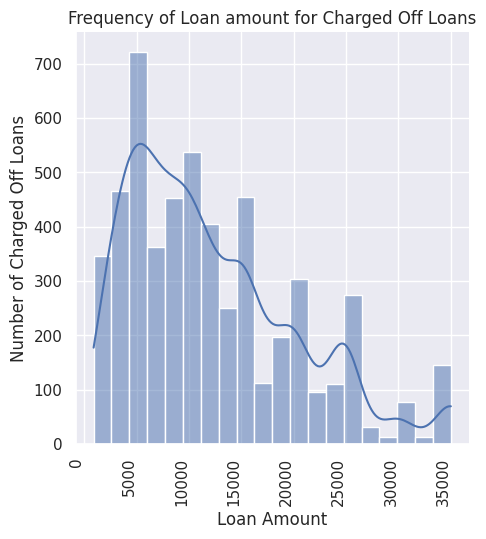

In [341]:
# 1. frequency of loan  amount for charged off loans

plt.figure(figsize=(15, 20))
sns.displot(df2[df2.loan_status == 'Charged Off'].loan_amnt, bins=20, kde=True)
plt.xticks(rotation=90, ha='right')
plt.title('Frequency of Loan amount for Charged Off Loans')
plt.xlabel('Loan Amount')
plt.ylabel('Number of Charged Off Loans')
plt.show()

---
* **Insight:** Loan amount of 5000 is been majorly 'defaulted'


---



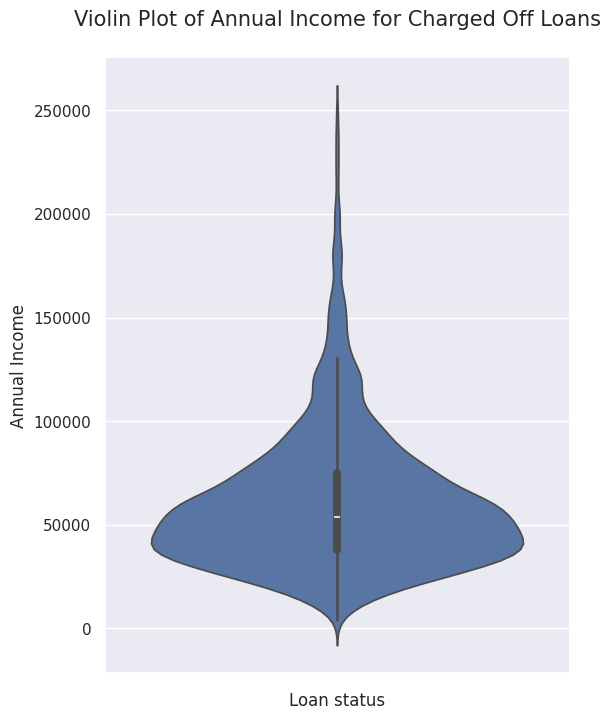

In [342]:
# 2. Annual income of charged off loan applicants

plt.figure(figsize=(6,8))
sns.violinplot(df2[df2.loan_status == "Charged Off"].annual_inc) # plotting violin plot of annual income of applicant who are marked as 'Charged Off'
plt.xlabel('Loan status')
plt.ylabel('Annual Income')
plt.title('Violin Plot of Annual Income for Charged Off Loans\n',fontsize = 15)
plt.show()

---
* **Insight**: Maximum number of loans that are being charged off by applicant whose incomes are in range of 25000-75000, so company should think wisely when giving loans to these type of applicants.
---



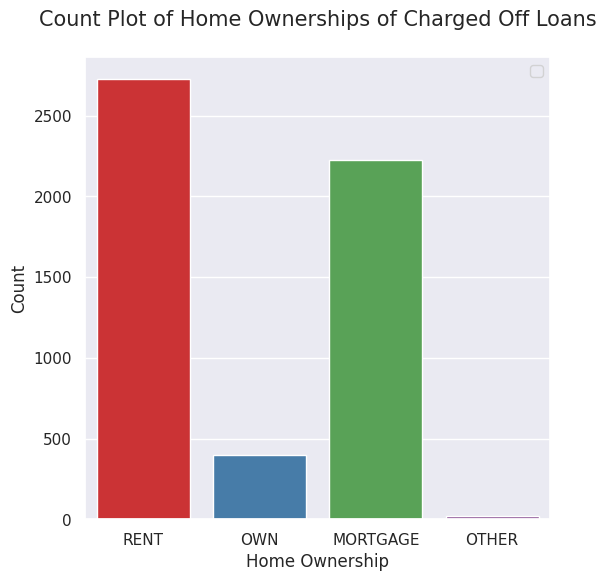

In [343]:
# 3. Home ownership of applicants who are charged off
plt.figure(figsize=(6,6))
sns.countplot(x='home_ownership', data=df2[df2.loan_status == 'Charged Off'], palette='Set1')
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.title('Count Plot of Home Ownerships of Charged Off Loans\n',fontsize = 15)
plt.legend()
plt.show()


# therefore those who have OWN houses are likely to pay loan as compared to those who are living on RENT.

---
* **Insight**: People who are on rent tend to default more.

---



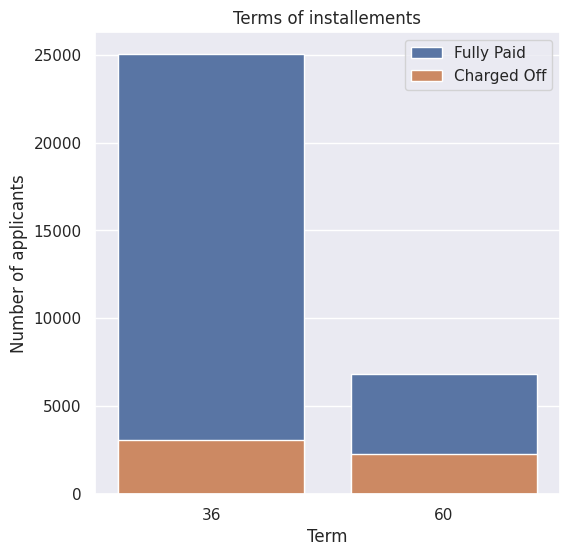

In [344]:
# 4. Term of insallments

# creating two filtered data set called fd1 and fd2
fd1 = df2[(df2.loan_status == "Charged Off" ) ].term.value_counts()
fd2 = df2[(df2.loan_status == "Fully Paid" ) ].term.value_counts()

# plotting two barplot
plt.figure(figsize=(6,6))
sns.barplot(x=fd2.index, y=fd2.values, label = "Fully Paid")
sns.barplot(x=fd1.index, y=fd1.values, label = "Charged Off")

plt.title('Terms of installements')
plt.xlabel('Term')
plt.ylabel('Number of applicants')

plt.legend()
plt.show()

# therefore people with 60 months term tends to default more.

---
* **Insight**: 60 month term is likely to be "Defaulted" in proportion to 36 months term.
---

<Figure size 600x800 with 0 Axes>

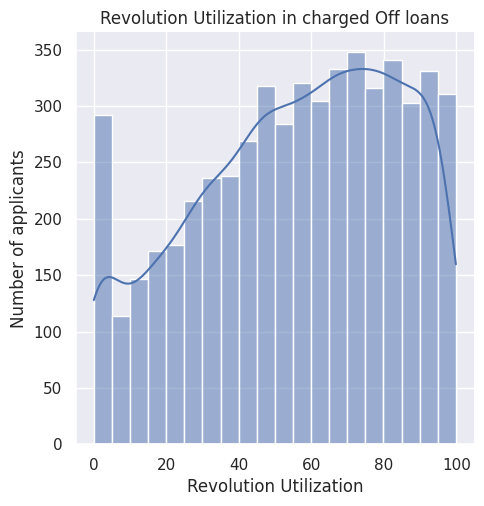

In [345]:
# 5. Revolution Uitilization distribution plot

plt.figure(figsize=(6,8))
sns.displot( x='revol_util', data=df2[df2.loan_status == 'Charged Off'], kde=True)
plt.title('Revolution Utilization in charged Off loans')
plt.xlabel('Revolution Utilization')
plt.ylabel('Number of applicants')
plt.show()


---
*   **Insight**: People with higher revolution utitzation tend to defualt more.
---



<Figure size 1000x600 with 0 Axes>

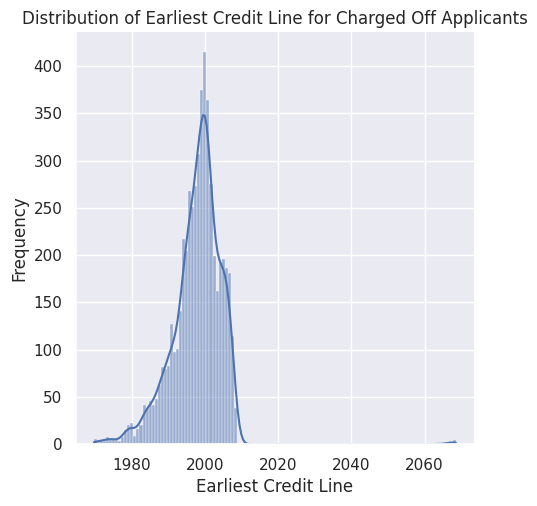

In [346]:
# 6 Distribution of Earliest Credit Line for Charged Off Applicants

# this will applicant having earliest in which year is tend to be more defaulted
plt.figure(figsize=(10, 6))
sns.displot(df2[df.loan_status == 'Charged Off'].earliest_cr_line, kde=True)
plt.title('Distribution of Earliest Credit Line for Charged Off Applicants')
plt.xlabel('Earliest Credit Line')
plt.ylabel('Frequency')
plt.show()

---
*   **Insight**: People who having earliest credit line between 1990 and 2000 tend to show more charged off rate.
---

## Bivariate


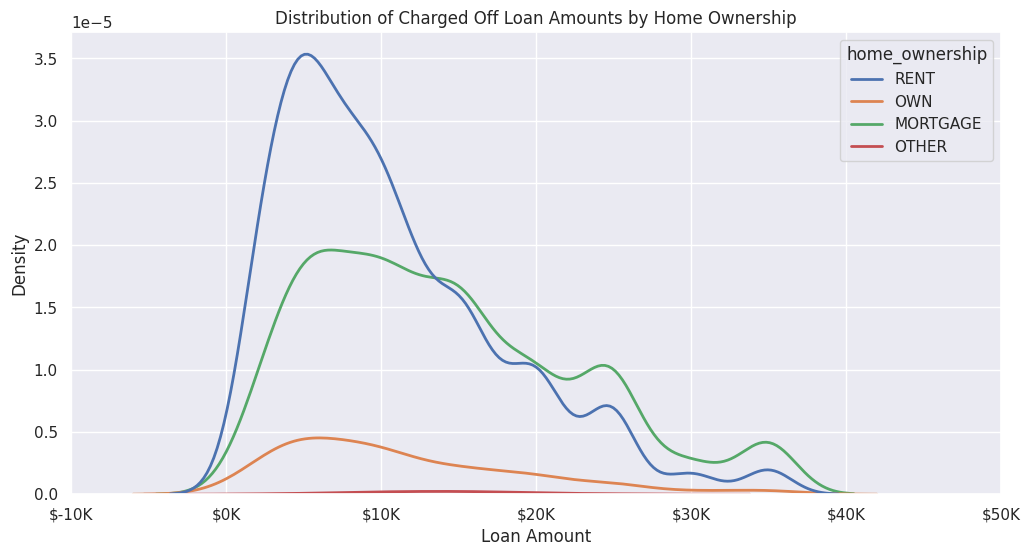

In [347]:
# 1. frequency of loan  amount for charged off loans with home ownership

plt.figure(figsize=(12, 6))
# plotting KDE plot of charged off loan with hue of home ownerships
sns.kdeplot(data=df2[df2.loan_status == 'Charged Off'],
            x='loan_amnt',
            hue='home_ownership',
            linewidth=2)

# this is make 5000 into $5K (found this trick on stck oF)
xticks = plt.xticks()[0]  # Get current x-tick values
plt.xticks(xticks, [f'${int(x/1000)}K' for x in xticks])

plt.title('Distribution of Charged Off Loan Amounts by Home Ownership')
plt.xlabel('Loan Amount')
plt.ylabel('Density')
plt.show()


---
*   **Insight**:
    1. There are more people who are on RENT and taking loan of around $5k and being marked as "Charged Off"
    2. After Loan amount of $15K there are more people with MORTGAGE and being marked as 'Charged Off'




---

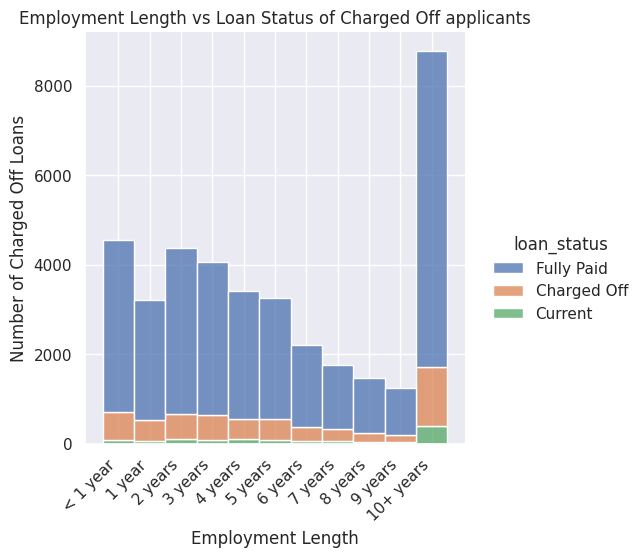

In [348]:
# showing how experience in work related to defaulting of loans
sns.displot(x='emp_length',data=df2, hue="loan_status", multiple="stack")
plt.title('Employment Length vs Loan Status of Charged Off applicants')
plt.xlabel('Employment Length')
plt.ylabel('Number of Charged Off Loans')
plt.xticks(rotation=45, ha='right')
plt.show()



---
**Note:**
Here we can see that applicant in 10+ years category are more in count for "charged off" loan status. This can be due to high number of applicant in 10+ years show this may show biased effect in plot. This phenomenon is known as **Base Rate Fallacy**

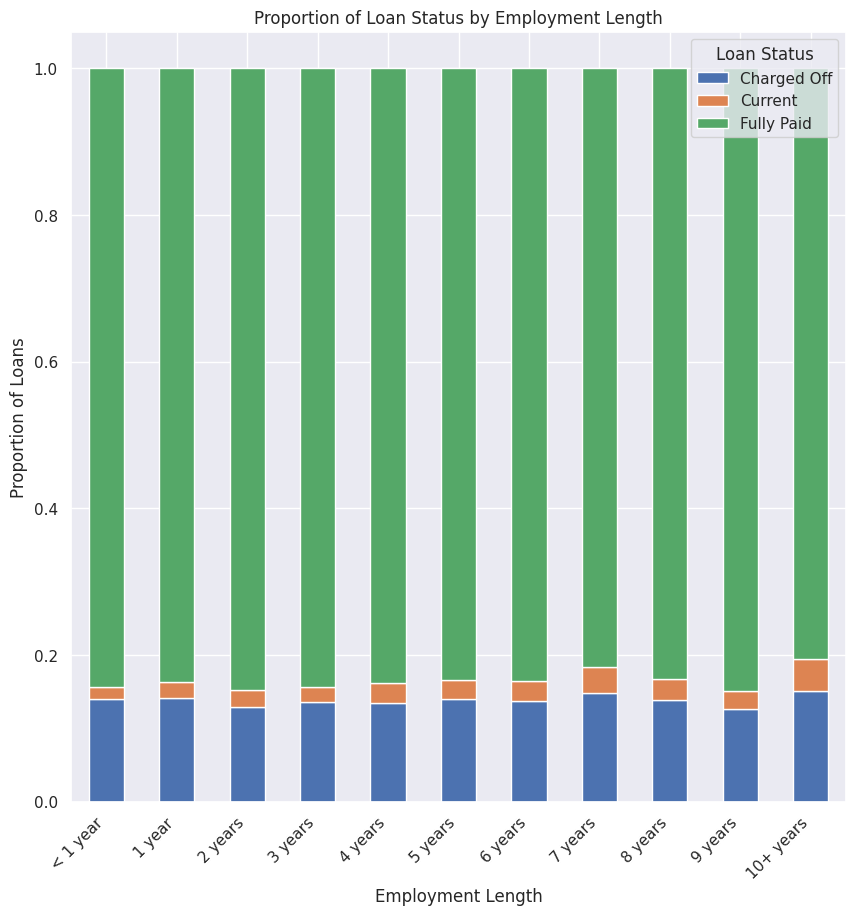

In [349]:
# 2. Proportion of loan status by emp length

# Normalize the data to get proportions

df_grouped = df2.groupby(['emp_length', 'loan_status']).size().unstack()
# this line groups two columns and count they combination and then unstack them

df_grouped = df_grouped.apply(lambda x: x / x.sum(), axis=1)
# this line normalize each entry by dividing it by sum of count in that row.

# i know this is pretty complex code but to find this insight I have to look into stack overflow and had to take reference...didn't had any choice

# now plotting stacked bar plot
df_grouped.plot(kind='bar', stacked=True)

plt.title('Proportion of Loan Status by Employment Length')
plt.xlabel('Employment Length')
plt.ylabel('Proportion of Loans')
plt.xticks(rotation=45, ha='right')
plt.legend(title="Loan Status")
plt.show()


---

 As expected, this plot shows that proportion of applicants in each employment lenght bar marked as charged off is pretty consistent.

**Insights**: **employment length alone can't be deciding factor in lending loans**

---

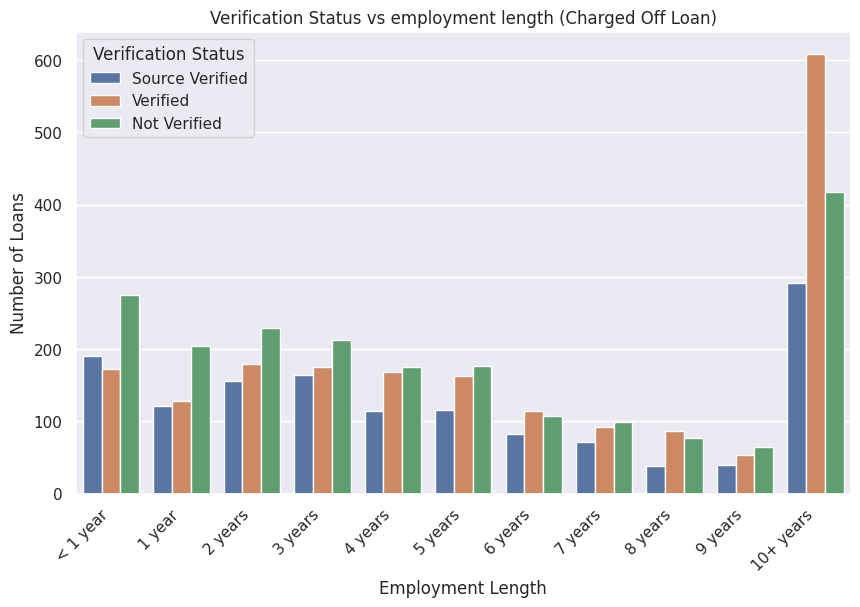

In [350]:
# 3.Verification Status vs employment length (Charged Off loan)

plt.figure(figsize=(10, 6))
sns.countplot(x='emp_length', data=df2[df2.loan_status == 'Charged Off'], hue="verification_status")
plt.xticks(rotation=45, ha='right')
plt.title('Verification Status vs employment length (Charged Off Loan)')
plt.xlabel('Employment Length')
plt.ylabel('Number of Loans')
plt.legend(title="Verification Status")
plt.show()


---
*   **Insight**:
    1. There are more **Not Verified** applicant with experience of **less then 3-4 years** and marked as 'charged off'.
    2. Except less then one year experience, rest all categories are having less count in **Source Verified**, So to minimize credit loss company should do more source verification.

* Company should lessen the number of un-verified applicant acceptance rate.
---

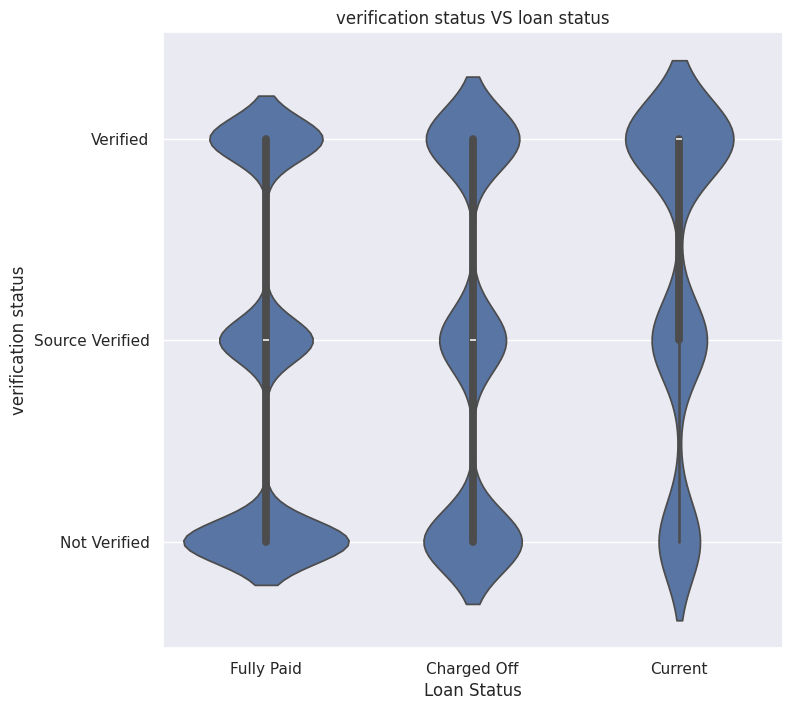

In [351]:
# 4. verification status VS loan status

plt.figure(figsize=(8, 8))
sns.violinplot(x='loan_status', y='verification_status', data=df2)
plt.title('verification status VS loan status')
plt.xlabel('Loan Status')
plt.ylabel('verification status')
plt.show()

---
*   **Insight**: As expected, **Source Verified** then to show less number in **Charged Off** category.
---

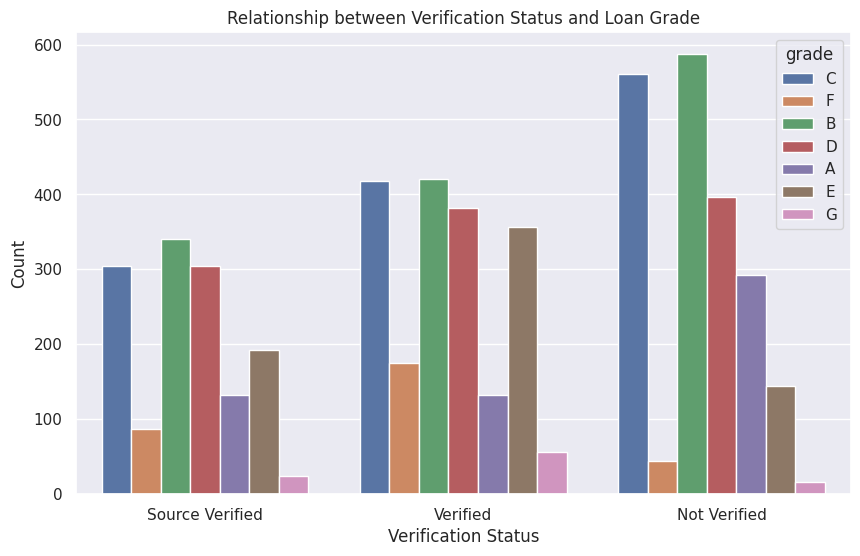

In [352]:
# 5. Relationship between Verification Status and Loan Grade

plt.figure(figsize=(10, 6))
sns.countplot(x='verification_status', hue='grade', data=df2[df2.loan_status == 'Charged Off'])
plt.title('Relationship between Verification Status and Loan Grade')
plt.xlabel('Verification Status')
plt.ylabel('Count')
plt.show()


---
*   **Insight**: People with grade B C are trusted by company without any verification done, and they are the one who are being defaulted more. Shouldn't blindly trust anyone grade and give them loan.  
---

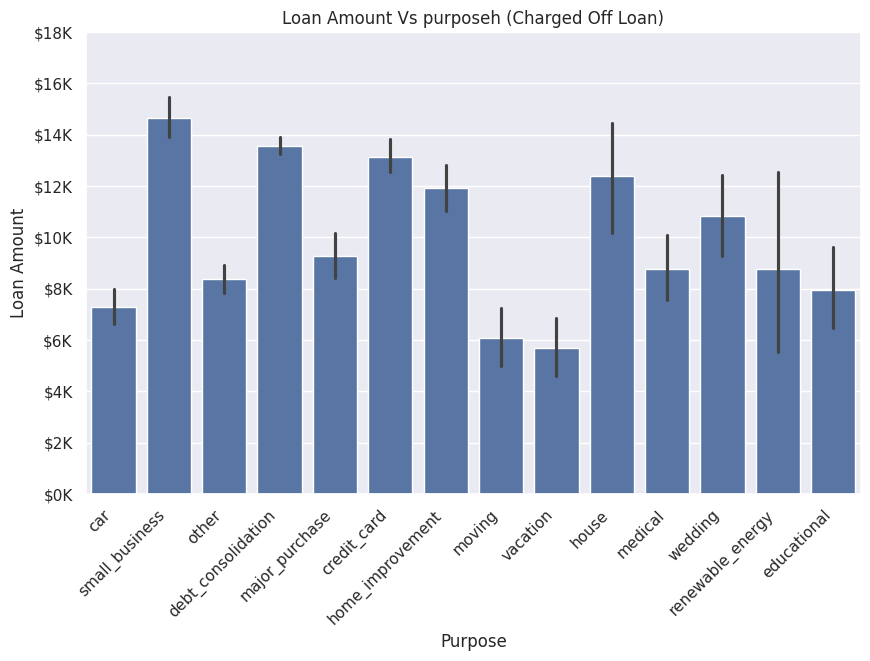

In [353]:
# 6. Loan Amount Vs purpose in Charged off loan applicants

plt.figure(figsize=(10, 6))
sns.barplot(x="purpose", y='loan_amnt', data=df2[df.loan_status == "Charged Off"])
plt.title('Loan Amount Vs purposeh (Charged Off Loan)')
plt.xlabel('Purpose')
plt.ylabel('Loan Amount')
yticks = plt.yticks()[0]
plt.yticks(yticks, [f'${int(y/1000)}K' for y in yticks])
plt.xticks(rotation=45, ha='right')
plt.show()

---
*   **Insight**:
      1. Loan of higher amount given to **Small Business** tends to be marked as 'charged Off'
      2. This trend is followed by **debt consolidation** and **credit card  **
---

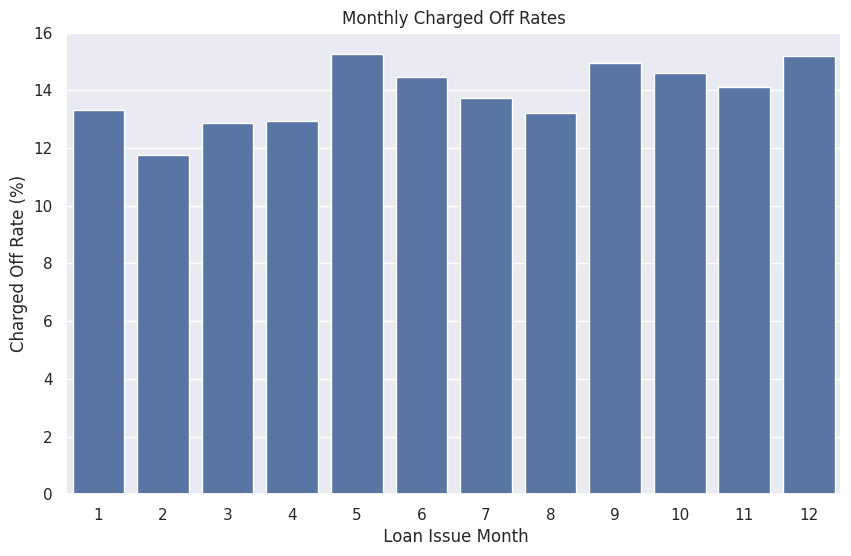

Months with the highset default rates:
issue_month
5     15.248963
12    15.182516
9     14.953005
10    14.593301
6     14.448309
Name: loan_status, dtype: float64


In [354]:
# 7. Monthl wise Charged Off Rates

df2['issue_d'] = pd.to_datetime(df2['issue_d'])

# Extract the month from 'issue_d'
df2['issue_month'] = df2['issue_d'].dt.month

# Group by issue month and then calculate the percentage of charged-off loans
monthly_default_rates = df2.groupby('issue_month')['loan_status'].apply(lambda x: (x == 'Charged Off').mean() * 100)

# Sort the months by default rate in descending order
monthly_default_rates = monthly_default_rates.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_default_rates.index, y=monthly_default_rates.values)
plt.xlabel(' Loan Issue Month')
plt.ylabel('Charged Off Rate (%)')
plt.title('Monthly Charged Off Rates')

plt.show()

# thne printing top 5 months with higher rate of being defalt
print("Months with the highset default rates:")
print(monthly_default_rates.head(5))

---
*   **Insight**:
    1. Month of **may** shows most Charged Off rate of about 15.31%
    2. **December** stands in this race with 15.17%
---

## Mulitvariate

<Figure size 1000x600 with 0 Axes>

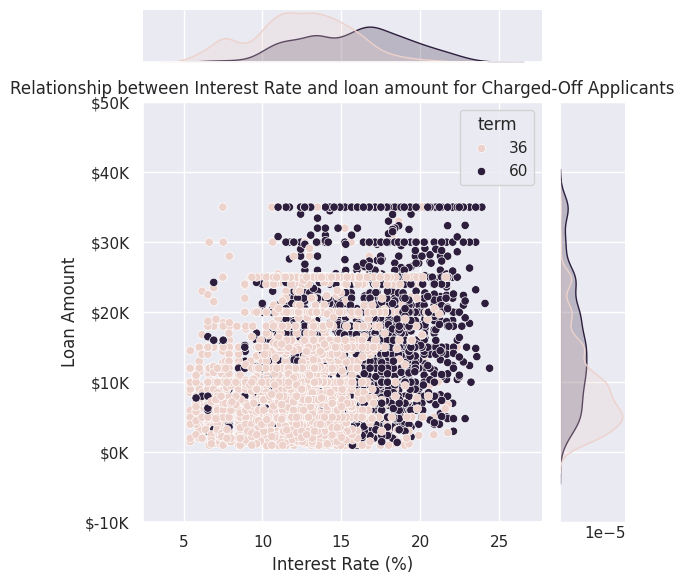

In [358]:
# 1 . Relationship between Interest Rate and loan amount for Charged-Off Applicants

plt.figure(figsize=(10, 6))
sns.jointplot(x='int_rate', y='loan_amnt',hue='term' ,data=df2[df2['loan_status'] == 'Charged Off'])
plt.title('Relationship between Interest Rate and loan amount for Charged-Off Applicants')
plt.xlabel('Interest Rate (%)')
plt.ylabel('Loan Amount')
# giving $ and K symbol to y ticks
yticks = plt.yticks()[0]
plt.yticks(yticks, [f'${int(y/1000)}K' for y in yticks])
plt.tight_layout()
plt.show()

---
*   **Insight**:
    1. People with 60 term and having higher interest Rate than 10% tend to be **defaulted** more.
    2. 60 months term having loan more between 10k-20k and having 35k are tend to be **defaulted** more.
    3. poeple having 36 months term having loan amount less than 10k tend to be **defaulted** more.
---

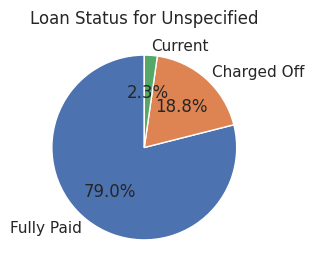

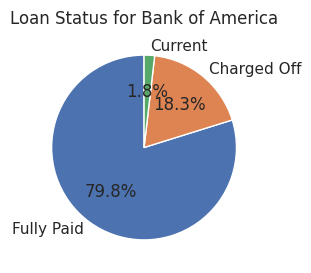

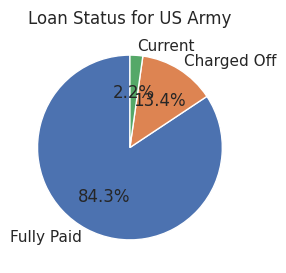

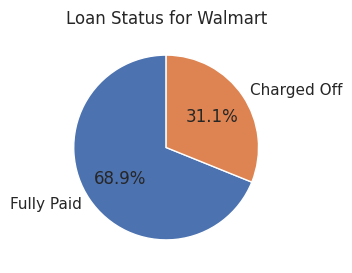

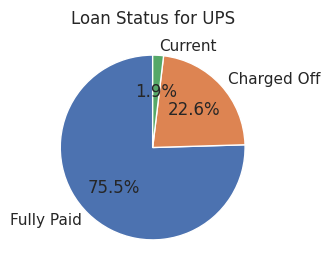

In [359]:
# 2. Loan status per emp title

# this following 2 lines are to sort out top 5 title in value_count() table
charged_off_emp_titles = df2[(df2.loan_status == "Charged Off")].emp_title.value_counts().head(5)
fully_paid_emp_titles = df2[(df2.loan_status == "Fully Paid")].emp_title.value_counts().head(5)

# for looping pie charts of emp titile
for emp_title in charged_off_emp_titles.index:
  loan_status_counts = df2[df2.emp_title == emp_title].loan_status.value_counts()
  plt.figure(figsize=(3, 3))
  plt.pie(loan_status_counts, labels=loan_status_counts.index, autopct='%1.1f%%', startangle=90)
  plt.title(f'Loan Status for {emp_title}') # replace emp_title with every for loop
  plt.show()

---
* **Insights:** **Employee of walmart are less likely to pay loans**
---


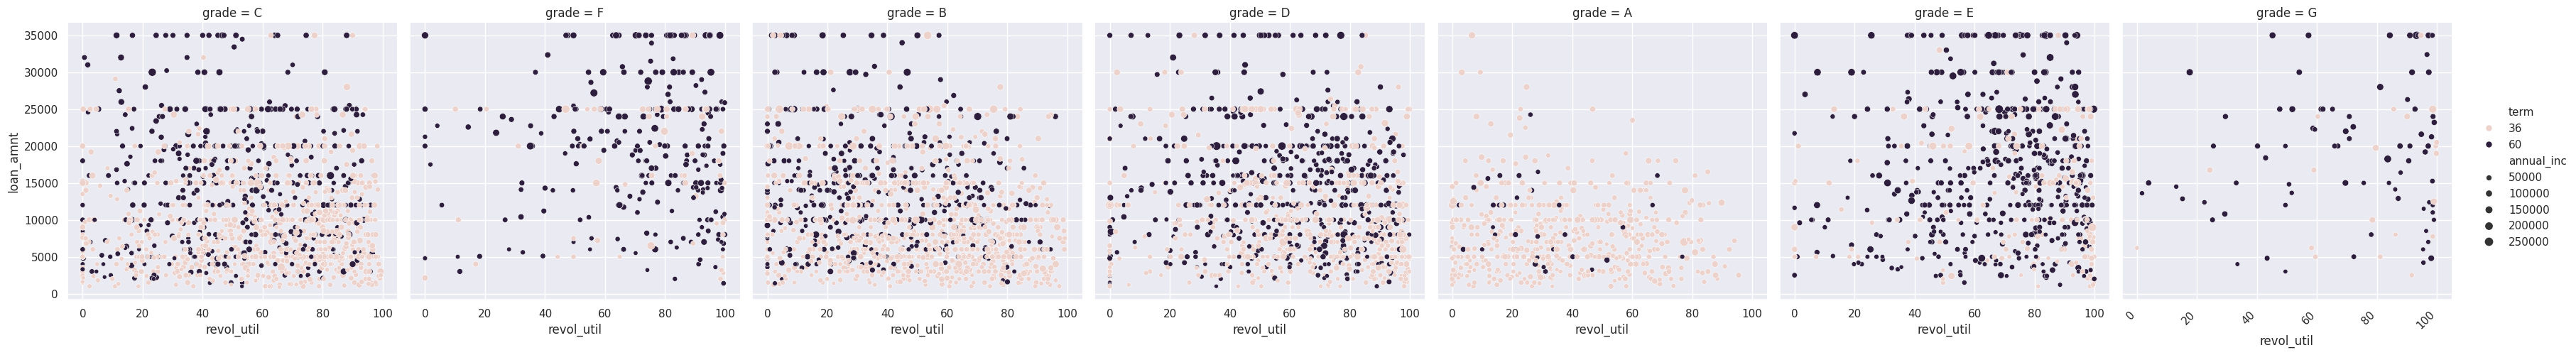

In [360]:
sns.relplot(x='revol_util', y='loan_amnt', data=df2[df.loan_status == 'Charged Off'], col='grade',hue="term", size="annual_inc")
plt.xticks(rotation=45, ha='right')
plt.show()

---
*   **Insight**:
    1. Grade B and C with higer revolution utilization are taking lower loan for 36 month term.


---